In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 图形梯度-Sobel算子
<br>

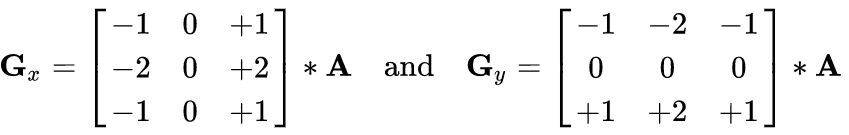

In [2]:
def cv2_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img = cv2.imread('../0-Datas/images/lena.jpg')

cv2_show('img',img)

dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
- ddepth:图像的深度
- dx和dy分别表示水平和竖直方向
- ksize是Sobel算子的大小

### 计算x

In [5]:
#右边减左边，白到黑是正数，黑到白是负数
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3) #cv2.CV_64F：图像深度，ksize：算子大小

cv2_show('sobelx',sobelx)

In [6]:
#求绝对值（所有负数会被截断为0）
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)

cv2_show('sobelx',sobelx)

### 计算y

In [8]:
#上边减下边，白到黑是正数，黑到白是负数
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

cv2_show('sobely',sobely)

In [9]:
#求绝对值
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)

cv2_show('sobely',sobely)

### 求和x与y

In [11]:
#分别计算
sobelxy1 = cv2.addWeighted(sobelx,0.5,sobely,0.5,0) #0.5:权重，0默认设置
cv2_show('sobelxy1',sobelxy1)

In [12]:
#直接计算（不推荐）
sobelxy2 = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy2 = cv2.convertScaleAbs(sobelxy2)
cv2_show('sobelxy2',sobelxy2)

# 图像梯度-Scharr算子
<br>

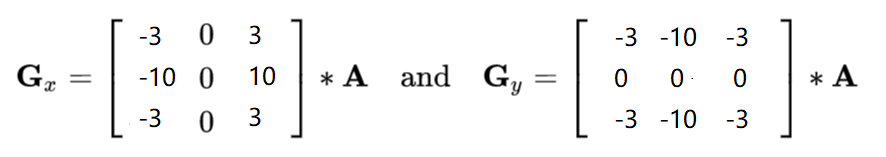

In [13]:
img = cv2.imread('../0-Datas/images/lena.jpg')

scarrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scarry = cv2.Scharr(img,cv2.CV_64F,0,1)
scarrx = cv2.convertScaleAbs(scarrx)
scarry = cv2.convertScaleAbs(scarry)
scarrxy = cv2.addWeighted(scarrx,0.5,scarry,0.5,0)

cv2_show('scarrxy',scarrxy)

# 图像梯度-laplacian算子
<br>

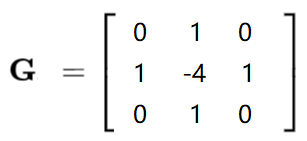

In [14]:
img = cv2.imread('../0-Datas/images/lena.jpg')

laplacian = cv2.Laplacian(img,cv2.CV_64F) #不需要x,y，是与周围点的比较
laplacian = cv2.convertScaleAbs(laplacian)

cv2_show('laplacian',laplacian)

# 算子对比
<br>
Scharr算子更丰富
<br>
laplacian算子对噪音更敏感，一般组合使用，不建议单独使用
<br>

In [15]:
res = np.hstack((sobelxy1,scarrxy,laplacian))
cv2_show('res',res)

# 边缘检测
<br>
1、高斯滤波器:进行归一化处理

2、计算梯度强度和方向:Sobel算法很简单，相对于其他边缘算子，Sobel算子得出来的边缘粗大明亮。

3、非极大值抑制:把梯度方向近似到水平，垂直和两个对角线四个方向，所以每个像素根据自身方向在这四个方向之一进行比较，决定是否保留

4、双阈值:梯度值>maxVal则处理为边界,梯度值<minVal则舍弃,minVal<梯度值<maxVal连有边界则保留否则舍弃

5、滞后边界跟踪:当弱边缘与强边缘点是在一个联通域中的话，我们会保留这个点。如果一个弱边缘点是孤立的点，那么直接去除该点即可。

#### 1:高斯滤波器

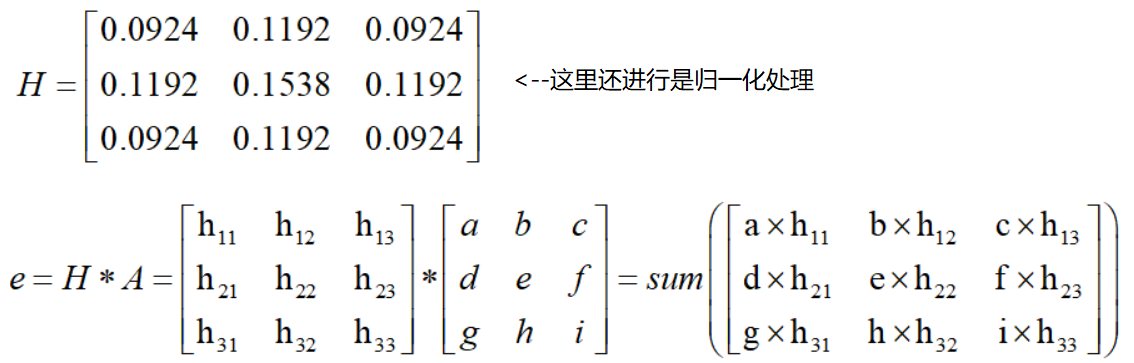

#### 2:梯度和方向

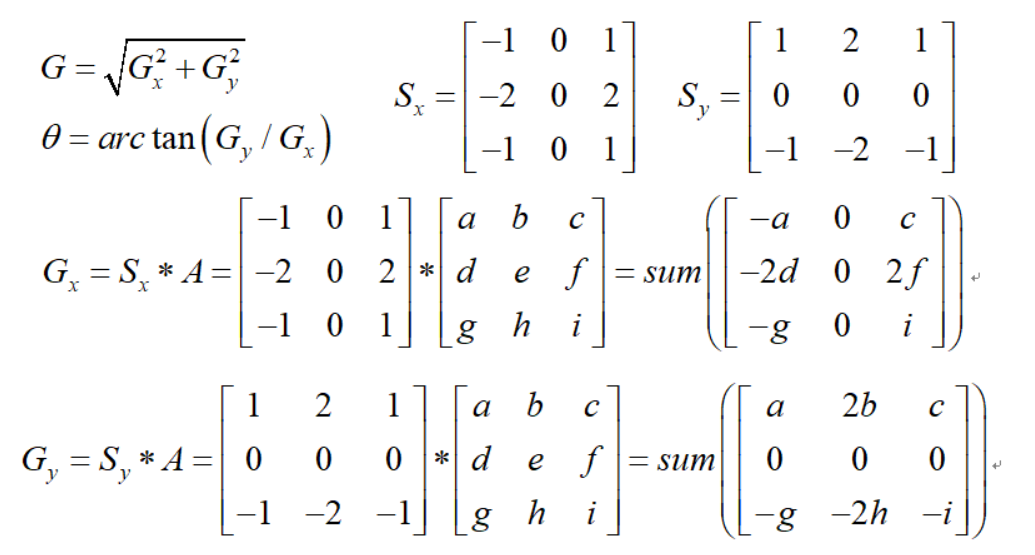

#### 3：非极大值抑制

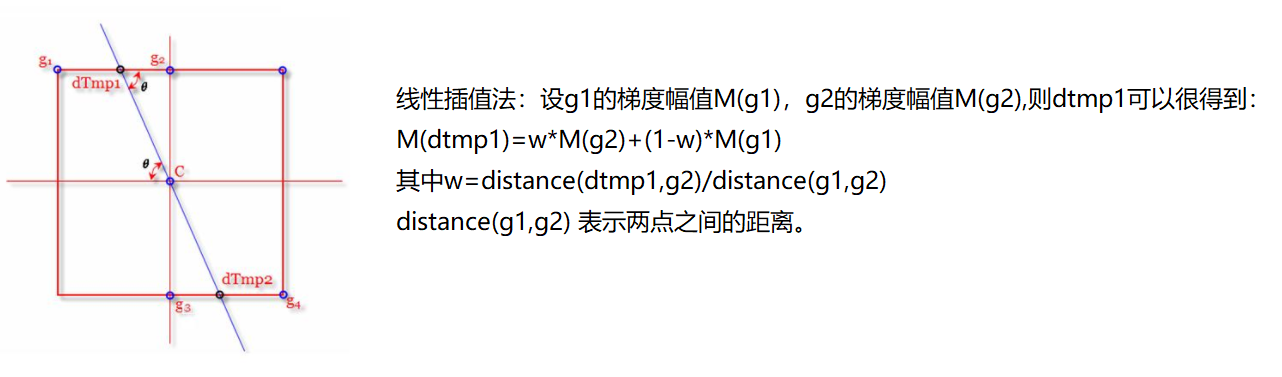
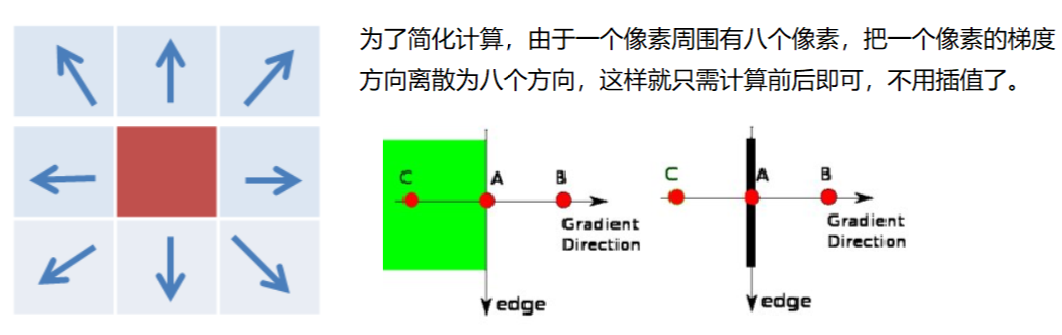

#### 4：双阈值检测

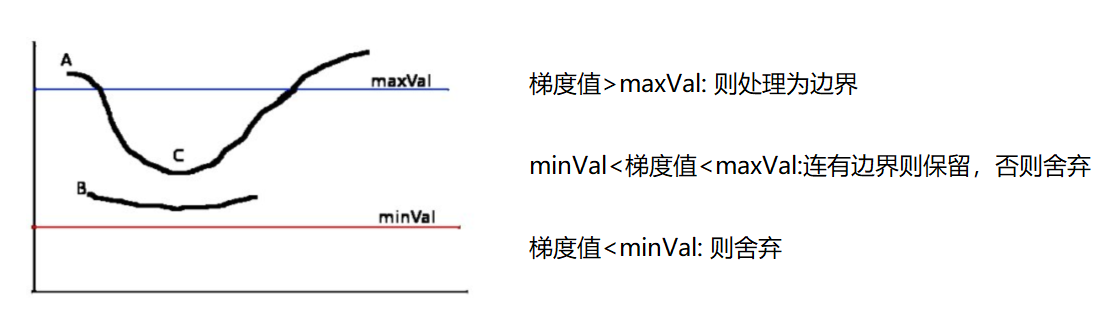

In [16]:
img = cv2.imread('../0-Datas/images/car.png')

v1 = cv2.Canny(img,80,150) #大:边缘信息少，不够细致
v2 = cv2.Canny(img,50,100) #小:边缘信息多，更丰富，容易引入噪声

res = np.hstack((v1,v2))
cv2_show('res',res)